# Titanic Survival Predictions
*Start Date : 2022-07-01*

First exploratory analysis of the Titanic data, available at this address: https://www.kaggle.com/competitions/titanic/data

Discovery of the different machine learning methods, as well as the selection of method to best predict the people who survived of the Titanic.

## Libraries

The first thing to do is to import the different libraries important to our analysis.

In [108]:
# Data analysis
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# Seaborn parameters
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("tab10")
sns.set_style("white")

## Import & Exploratory Data
The first thing to do when we have data that we don't know (we didn't get it) is to explore the dataset to learn more about it.

In [110]:
# Importing train data - test
test = pd.read_csv("../data/test.csv")
train = pd.read_csv("../data/train.csv")

# Quick data visualization
display(test.head())            # 5 first rows
print(test.shape)             # rows and columns numbers

display(train.head())
print(train.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


(891, 12)


We notice that the `test` data do not have a **Survived** column, which is ok since we want to test the probability of surviving individuals on this dataframe. \
From now on, we will focus on the `train` dataset until the creation of a machine learning model.

In [111]:
# Describe Train
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


It is important to look at the data as a whole. See if there are any abnormal data. \
For example, look if any Age can be lower than 0. This is not possible. For the moment, no data seems to be abnormal. Nevertheless, we realize that some variables do not have 891 values (Cabin, Age, Embarked). We will look at these variables in a little more detail later on.

# Column Descriptions : 
- `PassengerId`: unique ID for each passager
- `Survived`: Survival | 0 = No, 1 = Yes
- `Pclass` : Ticket class | 1st = Upper, 2nd = Middle, 3rd = Lower
- `Name`: First Name & Last Name + Grade
- `Sex`: Sex of the person
- `Age`: Age
- `SibSp`: # of siblings (brother, sister etc...) / spouse (husband, wife) aboard the Titanic
- `Parch`: # of parents / children aboard the Titanic
- `Ticket`: Ticket number
- `Fare`: Passenger Fare
- `Cabin Number`: Cambin number
- `Embarked`: port of Embarkation

In [112]:
# Data types
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
# Or
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

It may be interesting now that we have an overview of the data, to look at the missing data.

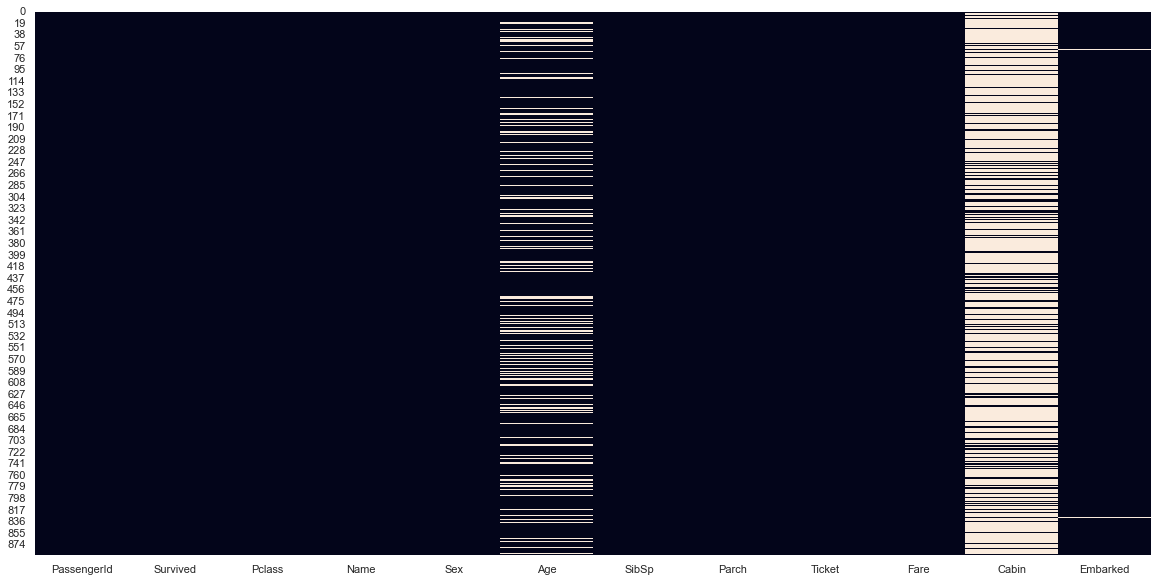

In [53]:
# Missing values
plt.figure(figsize=(20,10))
sns.heatmap(train.isna(), cbar = False)
plt.show()

As said above, we realize that the variables Age, Cabin and Embarked have missing data (white lines on the graph). For our model, no missing data is needed, so we will either have to delete rows or find a way to assign values according to the other passengers.

In [113]:
# Percentage of missing values
(train.isna().sum()/train.shape[0]).sort_values(ascending=False)

Cabin         0.77
Age           0.20
Embarked      0.00
PassengerId   0.00
Survived      0.00
Pclass        0.00
Name          0.00
Sex           0.00
SibSp         0.00
Parch         0.00
Ticket        0.00
Fare          0.00
dtype: float64

**For the moment what have we observed? :**
- There are 891 passengers in the train dataset;
- The Cabin variable is missing about 77% of values, which is quite important. We will have to think about whether to keep this variable or to delete it altogether;
- There is about 19% of values missing for the variable Age, which is an important variable, so we have to find a way to fill in the missing values;
- There is 0.22% of values missing for the variable Embarked, which is negligible, so we will assign it a predefined value.

## Data visualization
It is important to have an overview of our data. Graphical representation is the best way to see this overview. \
Each time, we will compare the data with the variable that is important to us: `Survived`.

### Variable Pclass
Reminder : Ticket class | 1st = Upper, 2nd = Middle, 3rd = Lower

In [114]:
def percentage_survived(data, features, condition):
    """
    Calculates the survival rate according to another variable with its condition.

    data = dataframe containing the data with the different variables, including the 'Survived' variable
    features = variable whose survival rate we want to know
    condition = the condition of the chosen variable, for example with a dummy variable : 0, 1, 2 etc...
    """

    results = round(data["Survived"][data[features] == condition].value_counts(normalize = True)[1]*100,2)

    return results

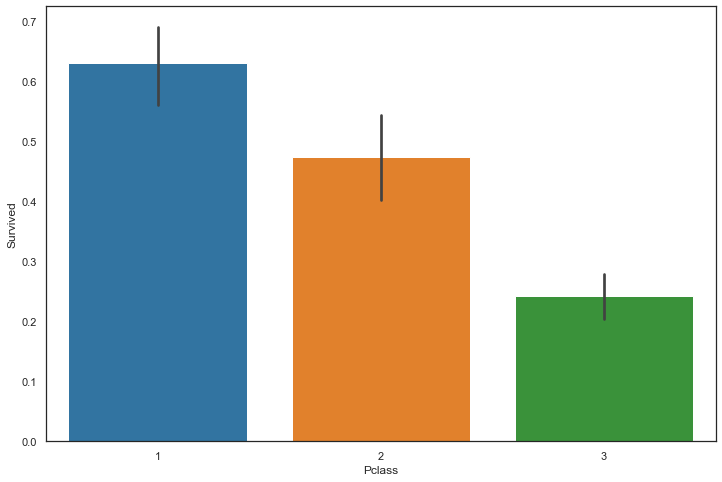

Percentage of Pclass = 1 who survived : 62.96%
Percentage of Pclass = 2 who survived : 47.28%
Percentage of Pclass = 3 who survived : 24.24%


In [115]:
# Barplot - Pclass
sns.barplot(data = train, x = "Pclass", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of Pclass = 1 who survived : {percentage_survived(train, 'Pclass', 1)}%")
print(f"Percentage of Pclass = 2 who survived : {percentage_survived(train, 'Pclass', 2)}%")
print(f"Percentage of Pclass = 3 who survived : {percentage_survived(train, 'Pclass', 3)}%")

It can be seen that people with a higher Pclass, also have a higher survival rate.
### Variable Sex
Sex of the person

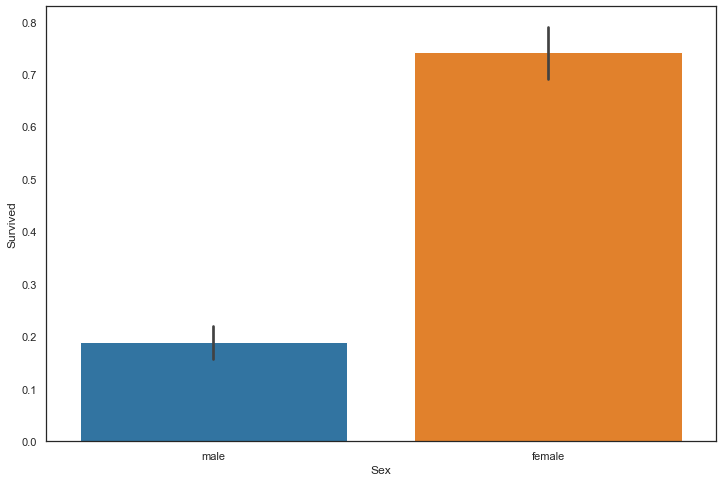

Percentage of females who survived : 74.2%
Percentage of males who survived : 18.89%


In [116]:
# Barplot - Sex
sns.barplot(data = train, x = "Sex", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of females who survived : {percentage_survived(train, 'Sex', 'female')}%")
print(f"Percentage of males who survived : {percentage_survived(train, 'Sex', 'male')}%")

Women have a higher chance of survival than men. Therefore, Sex becomes an essential variable in our prediction

### Variable SipSp
\# of siblings (brother, sister etc...) / spouse (husband, wife) aboard the Titanic

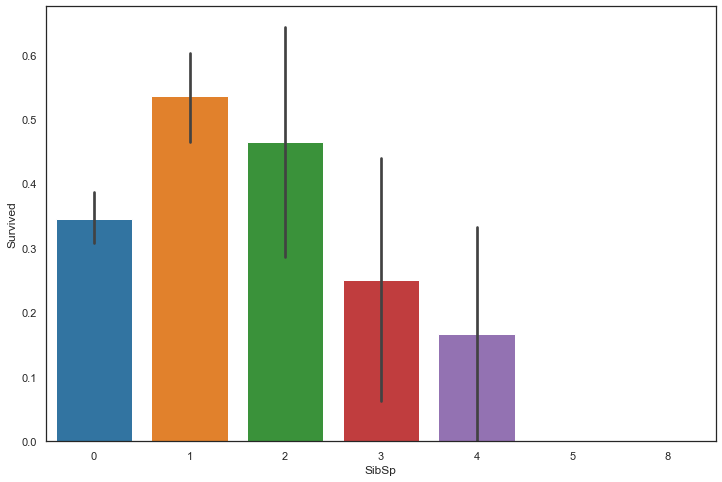

Percentage of SibSp = 0 who survived : 34.54%
Percentage of SibSp = 1 who survived : 53.59%
Percentage of SibSp = 2 who survived : 46.43%
Percentage of SibSp = 3 who survived : 25.0%
Percentage of SibSp = 4 who survived : 16.67%


In [117]:
# Barplot - Sex
sns.barplot(data = train, x = "SibSp", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of SibSp = 0 who survived : {percentage_survived(train, 'SibSp', 0)}%")
print(f"Percentage of SibSp = 1 who survived : {percentage_survived(train, 'SibSp', 1)}%")
print(f"Percentage of SibSp = 2 who survived : {percentage_survived(train, 'SibSp', 2)}%")
print(f"Percentage of SibSp = 3 who survived : {percentage_survived(train, 'SibSp', 3)}%")
print(f"Percentage of SibSp = 4 who survived : {percentage_survived(train, 'SibSp', 4)}%")

We can see that in order to have a higher survival rate, we need 1 or 2 siblings or spouses on board. Nevertheless, the survival rate degrades if we start to have more than 2.

### Variable Parch
\# of parents / children aboard the Titanic

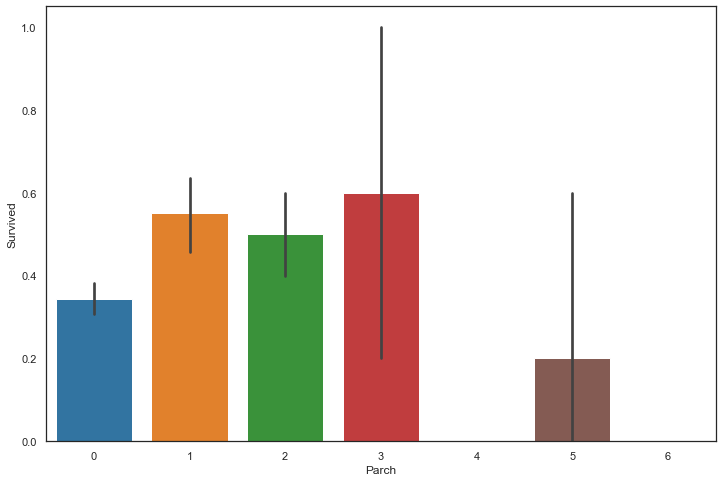

Percentage of Parch = 0 who survived : 34.37%
Percentage of Parch = 1 who survived : 55.08%
Percentage of Parch = 2 who survived : 50.0%
Percentage of Parch = 3 who survived : 60.0%
Percentage of Parch = 5 who survived : 20.0%


In [118]:
# Barplot - Sex
sns.barplot(data = train, x = "Parch", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of Parch = 0 who survived : {percentage_survived(train, 'Parch', 0)}%")
print(f"Percentage of Parch = 1 who survived : {percentage_survived(train, 'Parch', 1)}%")
print(f"Percentage of Parch = 2 who survived : {percentage_survived(train, 'Parch', 2)}%")
print(f"Percentage of Parch = 3 who survived : {percentage_survived(train, 'Parch', 3)}%")
print(f"Percentage of Parch = 5 who survived : {percentage_survived(train, 'Parch', 5)}%")

People who travel alone are less likely to survive than people with 1-3 parents or children. In addition, those with fewer than 4 parents and/or children on board have a higher rate of survival than those with 4 or more.

### Variable Embarked
port of Embarkation

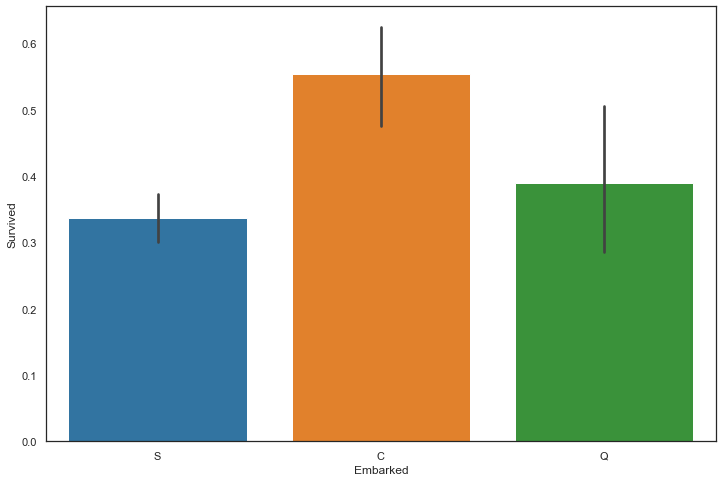

Percentage of Embarked = S who survived : 33.7%
Percentage of Embarked = C who survived : 55.36%
Percentage of Embarked = Q who survived : 38.96%


In [60]:
# Barplot - Sex
sns.barplot(data = train, x = "Embarked", y="Survived")
plt.show()

# Percentages of people who have survived through Pclass
print(f"Percentage of Embarked = S who survived : {percentage_survived(train, 'Embarked', 'S')}%")
print(f"Percentage of Embarked = C who survived : {percentage_survived(train, 'Embarked', 'C')}%")
print(f"Percentage of Embarked = Q who survived : {percentage_survived(train, 'Embarked', 'Q')}%")

People who embarked in Cherbourg (C) have the highest survival rate than people who embarked in Southampton (S) or Queenstown (Q)

### Variable Age
= Age

Since Age is a continuous variable, we will have to create categories for age groups. Also, since there is missing data in this variable, we will create a category for people whose age is not known. 

For the age categories :

- Baby : 0-4 years;
- Child : 5-12 years;
- Teen : 13-18 years;
- Adult : 19-35 years;
- Middle Age Adult : 36-59years;
- Senior : 60+

For this analysis, we will copy the `train` dataframe so as not to make any modification on it for the moment.

In [119]:
# Transform age into categories
train_2 = train.copy()
train_2["Age"] = train_2["Age"].fillna(-1)

age_bins = [-2,0,5,12,18,35,60,np.inf]
labels = ["Unknown", "Baby", "Child", "Teen", "Adult", "Middle Adult", "Senior"]
train_2["AgeGroup"] = pd.cut(train_2["Age"], age_bins, labels = labels)

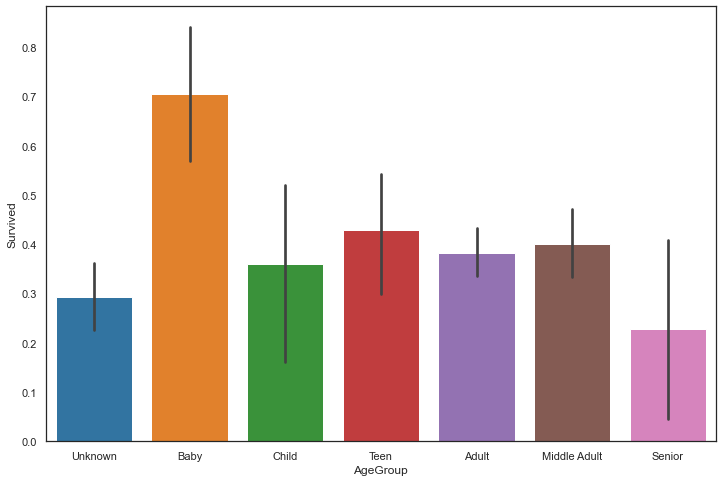

In [120]:
# Barplot - Sex
sns.barplot(data = train_2, x = "AgeGroup", y="Survived")
plt.show()

We see that the highest survival rate is for babies with over 70% survival rate. 

Now that we have had an overview of the dataset, we need to clean up our data to prepare it for our model. We will need to remove unnecessary variables, fill in missing data. 

For our model, we will only need categorical values. No string or continuous variables should be accepted.

## Data cleaning

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [122]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


We can delete the variables : 
- Cabin;
- Ticket;

These are variables that will be of no use to us in our analysis.

In [123]:
# Create a combine dataset with train and test
combine = [train, test]

for dataset in combine:
    dataset.drop(["Ticket","Cabin"], axis=1, inplace=True)

## Name Feature

It can be interesting to get the title in each name. Thus, we can make a variable dummy with the different titles.

We are going to make the modifications on the two dataframes at the same time (train and test).

In [124]:
for dataset in combine:
    dataset["Title"] = dataset["Name"].str.extract('([A-Za-z]+)\.', expand=False)

The RegEx pattern `(\w+\.)` matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

In [125]:
pd.crosstab(train["Title"],train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [126]:
(train["Title"].value_counts() < 10)

Mr          False
Miss        False
Mrs         False
Master      False
Dr           True
Rev          True
Mlle         True
Major        True
Col          True
Countess     True
Capt         True
Ms           True
Sir          True
Lady         True
Mme          True
Don          True
Jonkheer     True
Name: Title, dtype: bool

`'Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'` are the variables that appear less than 10 times in the dataset. 

Within these variables we can gather some data: 
- `Mlle, Ms` which can be assigned to Miss. 
- `Mme` by `Mrs`
- `Countess, Sir, Lady` by the same variable defining royalty for example.

In [69]:
# Replace titles with common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle', "Ms"], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

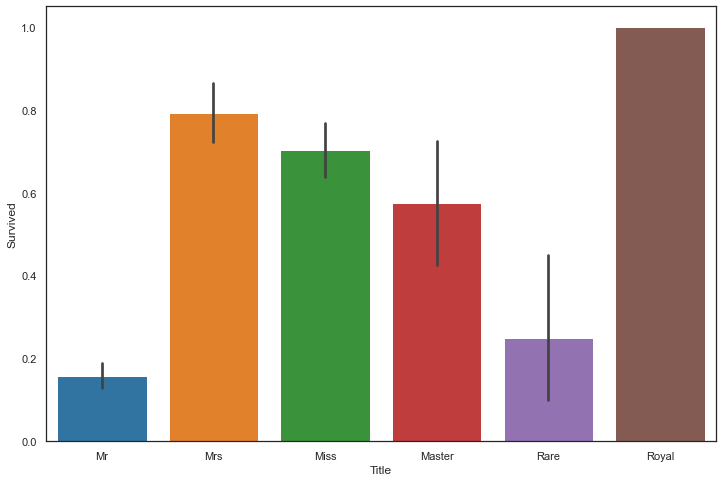

In [70]:
sns.barplot(data = train, x = "Title", y="Survived")
plt.show()

In [71]:
# Create a dummy variable
title_dummy = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_dummy)
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset.drop("Name", axis = 1, inplace=True)

### Sex features
Converting sex, with male = 0 and female = 1

In [72]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female": 1}).astype(int)

In [73]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.00,1,0,7.25,S,1
1,2,1,1,1,38.00,1,0,71.28,C,2
2,3,1,3,1,26.00,0,0,7.92,S,3
3,4,1,1,1,35.00,1,0,53.10,S,2
4,5,0,3,0,35.00,0,0,8.05,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.00,0,0,13.00,S,6
887,888,1,1,1,19.00,0,0,30.00,S,3
888,889,0,3,1,NaN,1,2,23.45,S,3
889,890,1,1,0,26.00,0,0,30.00,C,1


### Age features
Missing age with median age group for each title

In [74]:
guess_age = np.zeros(6)

In [75]:
for dataset in combine:        
    for i in range(0,6):
        guess_median = dataset[dataset["Title"]==i+1]['Age'].dropna().median()

        guess_age[i] = guess_median

    for i in range(0,6):
        dataset.loc[(dataset["Age"].isnull()) & (dataset["Title"] == i+1),"Age"] = guess_age[i]

In [76]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64

In [77]:
# Réutilisation du découpage réalisé plus haut
age_mapping = {'Baby': 1, 'Child': 2, 'Teen': 3, 'Adult': 4, 'Middle Adult': 5, 'Senior': 6}

for dataset in combine:
    dataset["AgeGroup"] = pd.cut(dataset["Age"], age_bins, labels = labels)
    dataset["Age"] = dataset["AgeGroup"].map(age_mapping).astype(int)
    dataset.drop("AgeGroup", axis = 1, inplace=True)

### Embarked Features

In [78]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Most of the passengers embarked in Southampton so we will put S as the port of embarkation. 

In [127]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

for dataset in combine:
    dataset["Embarked"].fillna("S", inplace=True)
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping) 

In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,1,Mr


### Fare features

In [129]:
# Fill NaN values by Median
for dataset in combine:
    dataset["Fare"].fillna(dataset["Fare"].dropna().median(), inplace=True)
    dataset["Fare"] = pd.qcut(dataset["Fare"], 4, labels=[1,2,3,4])

In [130]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,4,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,2,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,4,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,2,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,2,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,3,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,3,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,3,2,Mr


### SibSp & Parch Features

Create a variable is all alone or is not all alone

In [131]:
for dataset in combine:
    dataset["SibSp_Parch"] = dataset['SibSp'] + dataset['Parch']

    dataset["Alone"] = 0
    dataset.loc[dataset["SibSp_Parch"]==0,"Alone"] = 1

    dataset.drop(["SibSp","Parch","SibSp_Parch"], axis = 1, inplace = True)

In [132]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Title,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,4,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,2,1,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,4,1,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,2,1,Mr,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,2,1,Rev,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,3,1,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,1,Miss,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,3,2,Mr,1


## Model, predict and solve
Use differents types of model :
- Logistic Regression ;
- KNN ;
- Random Forest ;
- Support Vector Machines ; 
- Decision Tree ; 

In [107]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [91]:
X_train = train.drop(["PassengerId","Survived"], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

**Logistic Regression**: can be used to model the probability of a passenger surviving or not in the Titanic disaster based on their characteristics such as age, fare, socio-economic status, etc. The coefficients of the logistic regression are estimated based on historical data of known passengers, and can then be used to predict the survival probability of a passenger based on their characteristics.

In [133]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
accuracy_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
accuracy_logreg

80.47

**KNN (K-Nearest Neighbors)** : is a classification algorithm that makes predictions based on the majority class of the K nearest data points to a given test sample. In the context of the Titanic disaster, KNN can be used to predict the survival or non-survival of a passenger by comparing their characteristics to the K nearest passengers in the historical data, and assigning them the majority class of those K nearest neighbors.

In [134]:
# KNN 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2)
accuracy_knn

81.03

**Random Forest** : is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final classification decision. In the context of the Titanic disaster, Random Forest can be used to model the survival or non-survival of a passenger by training multiple decision trees on different subsets of the historical data and using the majority vote of the decision trees to make a final prediction for a given test sample. This approach can help to reduce overfitting and improve the overall accuracy of the model.

In [135]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
accuracy_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
accuracy_random_forest

86.98

**SVM  (Support Vector Machine)** : is a supervised learning algorithm that is used for classification tasks by finding a hyperplane that maximally separates the data into different classes. In the context of the Titanic disaster, SVM can be used to predict the survival or non-survival of a passenger by training the algorithm on the historical data and finding the hyperplane that best separates the survivors and non-survivors. The prediction for a given test sample is made based on which side of the hyperplane it falls on.

In [136]:
# Support Vector Machine : 
svc = svm.SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
accuracy_svc = round(svc.score(X_train, Y_train) * 100, 2)
accuracy_svc

82.04

**Decision Tree :** is a tree-based algorithm that can be used for both regression and classification tasks by recursively splitting the data into smaller subgroups based on the values of the features. In the context of the Titanic disaster, a Decision Tree can be used to model the survival or non-survival of a passenger by training the algorithm on the historical data and using the tree to make predictions by following a series of decision rules based on the values of the passenger's characteristics. The prediction is made by reaching a final leaf node of the tree that represents the class label (survived or not).

In [137]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
accuracy_decision_tree

86.98

# Conclusion

In [147]:
# Dataframe that summarizes the different machine learning methods and their accuracy
dict = {
    "Model" : ["Logistic Regression","KNN","Random Forest","Support Vector Machines","Decision Tree"],
    "Accuracy" : [accuracy_logreg, accuracy_knn, accuracy_random_forest, accuracy_svc, accuracy_decision_tree]
}

accuracy_models = pd.DataFrame(dict)
accuracy_models.sort_values("Accuracy", ascending = False)

,Model,Accuracy
2,Random Forest,86.98
4,Decision Tree,86.98
3,Support Vector Machines,82.04
1,KNN,81.03
0,Logistic Regression,80.47


Random Forrest model seems to be the **most accurate**, so we will use this model

In [151]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

estimation_random_forest = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : Y_pred
})

In [155]:
estimation_random_forest["Survived"].value_counts()

0    263
1    155
Name: Survived, dtype: int64

# Improvement Point : 
- Optimizing the performance of the model using machine learning techniques such as cross-validation and hyperparameter tuning.
- Interpretation of the results to understand the strengths and limitations of the model.
- Use correlation matrix ;
- Use function to evaluate each models.